In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: ylabel='price'>

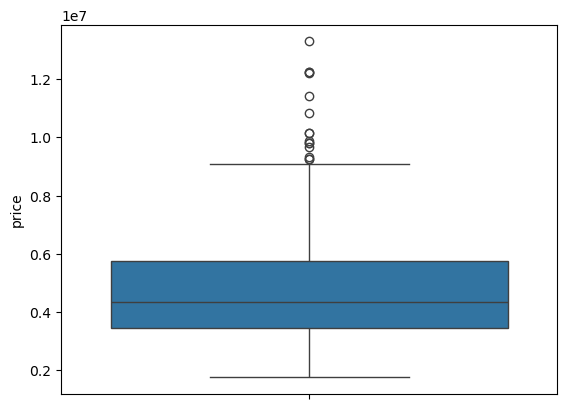

In [5]:
sns.boxplot(df['price'])

In [6]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR = Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [7]:
df['price']=df['price'].clip(lower=lower_bound,upper=upper_bound)

<Axes: ylabel='price'>

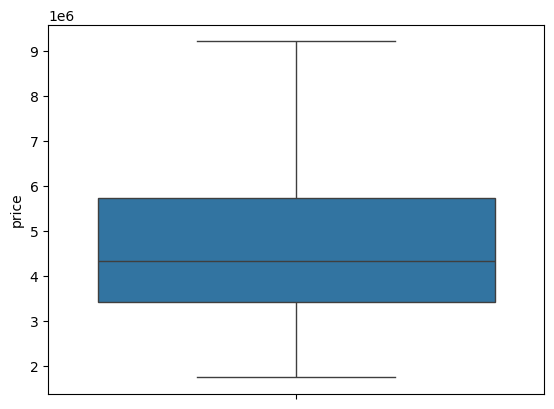

In [8]:
sns.boxplot(df['price'])

In [9]:
y=df['price']

<Axes: ylabel='area'>

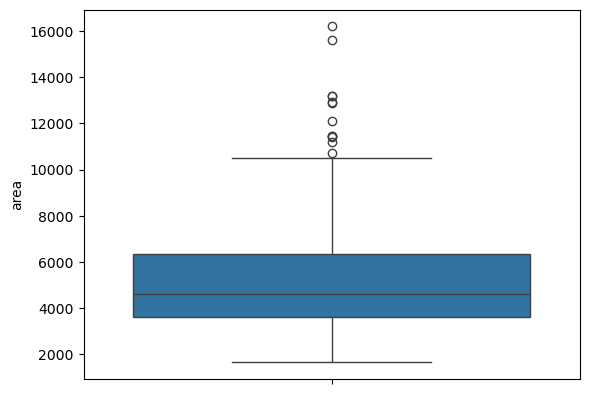

In [10]:
sns.boxplot(df['area'])

In [11]:
Q_1=df['area'].quantile(0.25)
Q_3=df['area'].quantile(0.75)
IQ_R = Q_3-Q_1
lowerbound=Q_1-1.5*IQ_R
upperbound=Q_3+1.5*IQ_R

In [12]:
df['area']=df['area'].clip(lower=lowerbound,upper=upperbound)

<Axes: ylabel='area'>

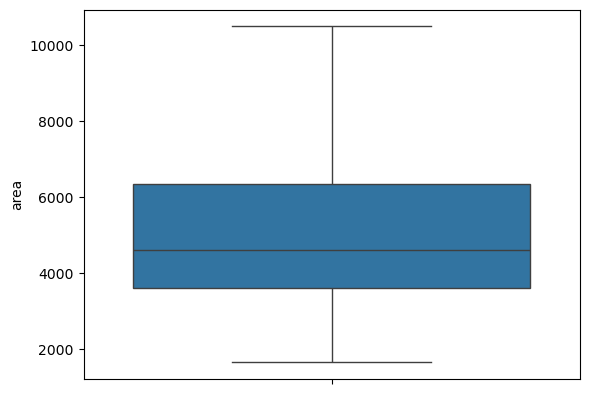

In [13]:
sns.boxplot(df['area'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})

df['basement']=df['basement'].map({'yes':1,'no':0})

df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})

df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})

df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

df['furnishingstatus']=df['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,1,0,0,0,1,2,1,1
1,9205000,8960,4,4,4,1,0,0,0,1,3,0,1
2,9205000,9960,3,2,2,1,0,1,0,0,2,1,2
3,9205000,7500,4,2,2,1,0,1,0,1,3,1,1
4,9205000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [17]:
x=df.drop(columns=['price','furnishingstatus'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_scr=r2_score(y_test,y_pred)

In [27]:
r2_scr*100

68.4928898146147